## 분류 모델

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()
iris.keys()
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.2, random_state=11)

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등.
   지니 지수는 얼마나 불확실한가(얼마나 섞여있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 하이퍼 파라미터 : 학습 프로세스가 시작되기 전에 설정되는 매개변수로서 의사결정 트리가 구축되는 방식에 영향을 주어 구조와 성능에 영향을 준다.
 - 최대 깊이(max_depth):
    - 설명: 트리의 최대 깊이. 이는 뿌리와 잎 사이의 최대 길이.
    - 영향: 트리가 깊어지면 더 복잡한 패턴을 포착할 수 있지만 과적합이 발생할 수 있다. 더 얕은 나무는 적합하지 않을 수 있다.
 - 최소 샘플 분할(min_samples_split):
    - 설명: 분할을 고려하기 위해 노드에 있어야 하는 최소 샘플 수를 정의.
    - 영향: 값이 높을수록 모델이 매우 특정한 패턴(과적합)을 학습하는 것을 방지하는 반면, 값이 낮을수록 데이터에서 노이즈가 포착될 수 있다.
 - 최소 샘플 리프(min_samples_leaf):
    - 설명: 분할 후 리프 노드에 있어야 하는 최소 샘플 수를 설정.
    - 영향: min_samples_split과 유사하게 과적합을 제어. 값이 높을수록 샘플이 거의 없는 리프 노드가 생성되지 않는다.
 - 최대 기능(max_features):
    - 설명: 노드 분할을 위해 고려되는 최대 기능 수.
    - 영향: 이 수를 줄이면 앙상블 모델에서 트리의 다양성이 증가할 수 있지만 중요한 기능이 제외될 수도 있다.
 - 기준(기준):
    - 설명 : 분할 품질을 측정하는 데 사용되는 기능. 일반적인 기준에는 지니 불순물에 대한 "gini", 분류 트리의 정보 이득에 대한 "엔트로피", 회귀 트리에 대한 "mse"(평균 제곱 오류)가 포함.
    - 영향: 기준 선택은 나무가 자라는 방식에 영향을 미치고 모델 성능에 영향을 미칠 수 있다.
 - 최대 리프 노드(max_leaf_nodes):
    - 설명: 트리의 최대 리프 노드 수.
    - 영향: 트리의 크기와 복잡성을 제어하는 ​​데 사용할 수 있다. 리프 노드가 많을수록 더 복잡한 모델이 가능.

* 장점:
 - 해석성: 전문가가 아니더라도 쉽게 이해하고 해석할 수 있습니다.
 - 데이터 정규화 필요 없음: 데이터 정규화가 필요하지 않습니다.
 - 비선형 관계 처리: 기능 간의 비선형 관계를 처리할 수 있습니다.
* 단점:
 - 과적합: 잡음이 있는 데이터를 과적합하는 경향이 있습니다.
 - 불안정성: 데이터의 작은 변화로 인해 완전히 다른 트리가 나타날 수 있습니다.
 - 편향된 트리: 지배적인 클래스에 편향되어 있습니다.

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

In [ ]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)


# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()

X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

# 성능 평가
# from sklearn.metrics import accuracy_score, classification_report

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
# creport = classification_report(y_test,pred)

print(f'결정 트리 예측 정확도: {accuracy:.4f}','\n')

결정 트리 예측 정확도: 0.9333 



지니계수 산출 사례
- 지니계수가 0인 경우 완전한 평등 : 소득 배열: [20, 20, 20, 20, 20]
- 지니계수가 1인 경우 한 명만 100의 소득을 가지고, 나머지는 모두 0의 소득 [0, 0, 0, 0, 100]

$G=1−∑
i=1
n
​
 (L
i
​
 +L
i−1
​
 )(P
i
​
 −P
i−1
​
 )=1−(0+0.2)⋅0.2=1−0.2⋅1=1−0=1$


𝐿
𝑖
L
i
​
 는 누적 소득 비율,
𝑃
𝑖
P
i
​
 는 누적 인구 비율입니다.

인구 비율 (P): [0, 0.2, 0.4, 0.6, 0.8, 1.0]
소득 비율 (L): [0, 0, 0, 0, 0, 1]

In [ ]:
# DecisionTree Classifier 생성
# dt_clf = DecisionTreeClassifier(random_state=156)
# Pruning(가지치기) : 맨 마지막 leaf노드들이 root노드까지 바로 가는데 걸리는 조건(edge)의 개수인 깊이를 제한
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_split= 5,random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf= 4,random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
# keys = iris_data.keys()
# print(keys)
# print(iris_data.data)
# print(iris_data.feature_names)

X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

# 성능 평가
# from sklearn.metrics import accuracy_score, classification_report

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
# creport = classification_report(y_test,pred)

print(f'결정 트리 예측 정확도: {accuracy:.4f}','\n')
# print(f'classification report:\n {creport}')

결정 트리 예측 정확도: 0.9333 



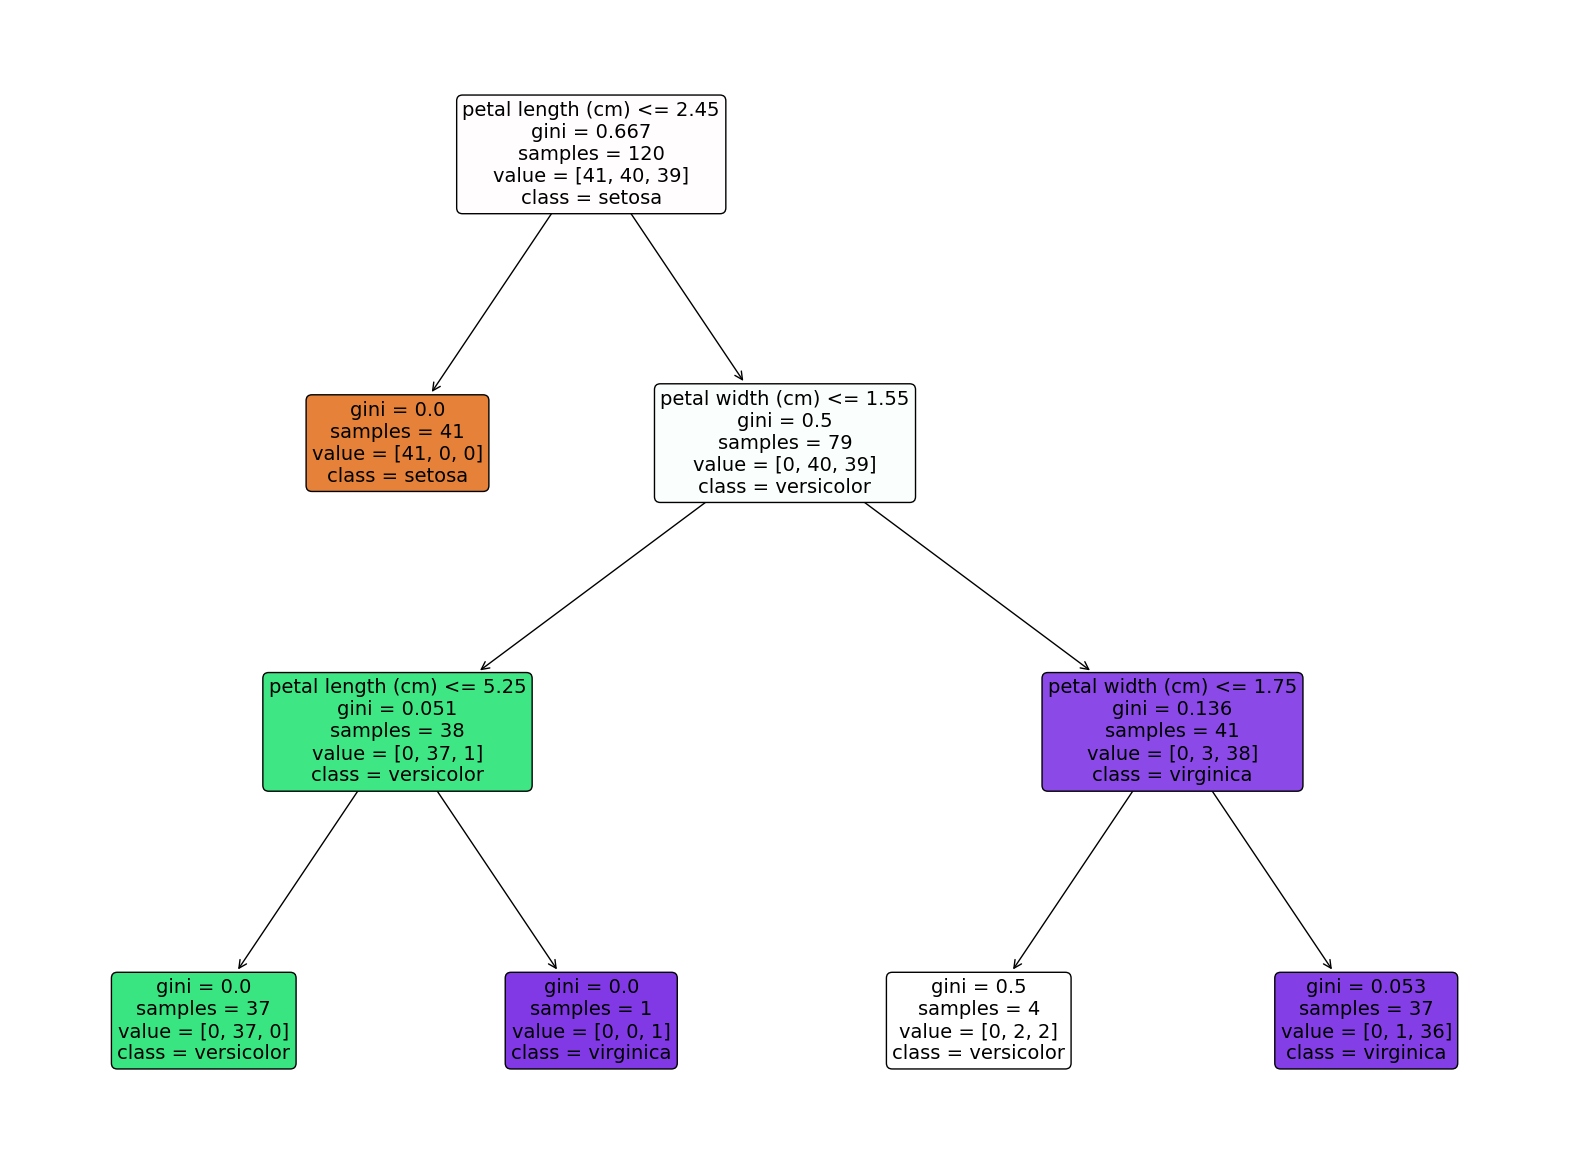

In [ ]:
# DT 시각화
# gini계수는 엔트로피와 마찬가지로 낮을 수록 분류가 잘 된것으로 판단하며 기본적으로 의사결정나무는
# ginin계수와 엔트로피를 낮추는 방향으로 분류를 진행
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True, # filled=True 각 노드를 클래스에 따라 다른 색으로 채움
              feature_names=iris_data.feature_names,
              class_names=iris_data.target_names,
              rounded=True, fontsize=14)
plt.show()
plt.close()

- 꽃잎 길이가 2.0, 꽃잎 너비가 0.5인 꽃
- 꽃잎 길이가 3.0, 꽃잎 너비가 1.2인 꽃
- 꽃잎 길이가 5.0, 꽃잎 너비가 2.0인 꽃

Feature importances: 
 [0.    0.    0.558 0.442] 

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<Axes: >

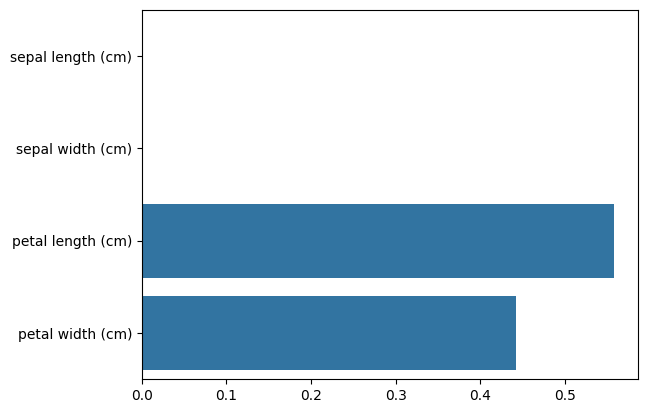

In [ ]:
import seaborn as sns
import numpy as np


# feature importance 추출
print(f'Feature importances: \n {np.round(dt_clf.feature_importances_,3)}','\n')

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
# _로 끝나는 속성은 모델이 데이터에 대해 학습을 수행한 후에 생성되는 속성을 의미하며 자동으로 생성, 예로 각 특성(feature)의 중요도
    print(f'{name} : {value:.3f}')

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

In [ ]:
# Confusion matrix를 활용한 정확도 비교
# 가지치기를 한 의사결정나무의 정확도가 가장 떨어진다. 하지만 학습데이터를 분류한 것이라는 사실을 염두해 두어야 한다.
# 만약 새로운 데이터가 들어오면 말했듯이 맨 마지막 가지치기의 의사결정나무가 일반화된 특징을  잡을 가능성이 높다.
# array[0, 0] = 50: 실제 클래스 0이면서 예측된 클래스 0인 경우. (정확한 예측)
# array[1, 2] = 1: 실제 클래스 1이지만 예측된 클래스 2인 경우. (잘못된 예측)
# array[2, 1] = 4: 실제 클래스 2이지만 예측된 클래스 1인 경우. (잘못된 예측)
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_data.target, dt_clf.predict(iris_data.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]])

Q. load_breast_cancer 데이터셋을 불러와서 다음을 수행하세요.
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증 = 8:2)
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대 깊이는 3으로 설정
- 다양한 하이퍼 파라미터 설정하여 결과 확인
- 결정트리를 시각화


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# print("cancer.keys():\n", cancer.keys())
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# stratify는 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, \
                                                 stratify=cancer.target, random_state=150)
# dt_tree = DecisionTreeClassifier()
dt_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)

accuracy = accuracy_score(y_test,pred)
# 훈련데이터 예측정확도
print(f'정확도: {round(accuracy,2)}')

정확도: 0.89


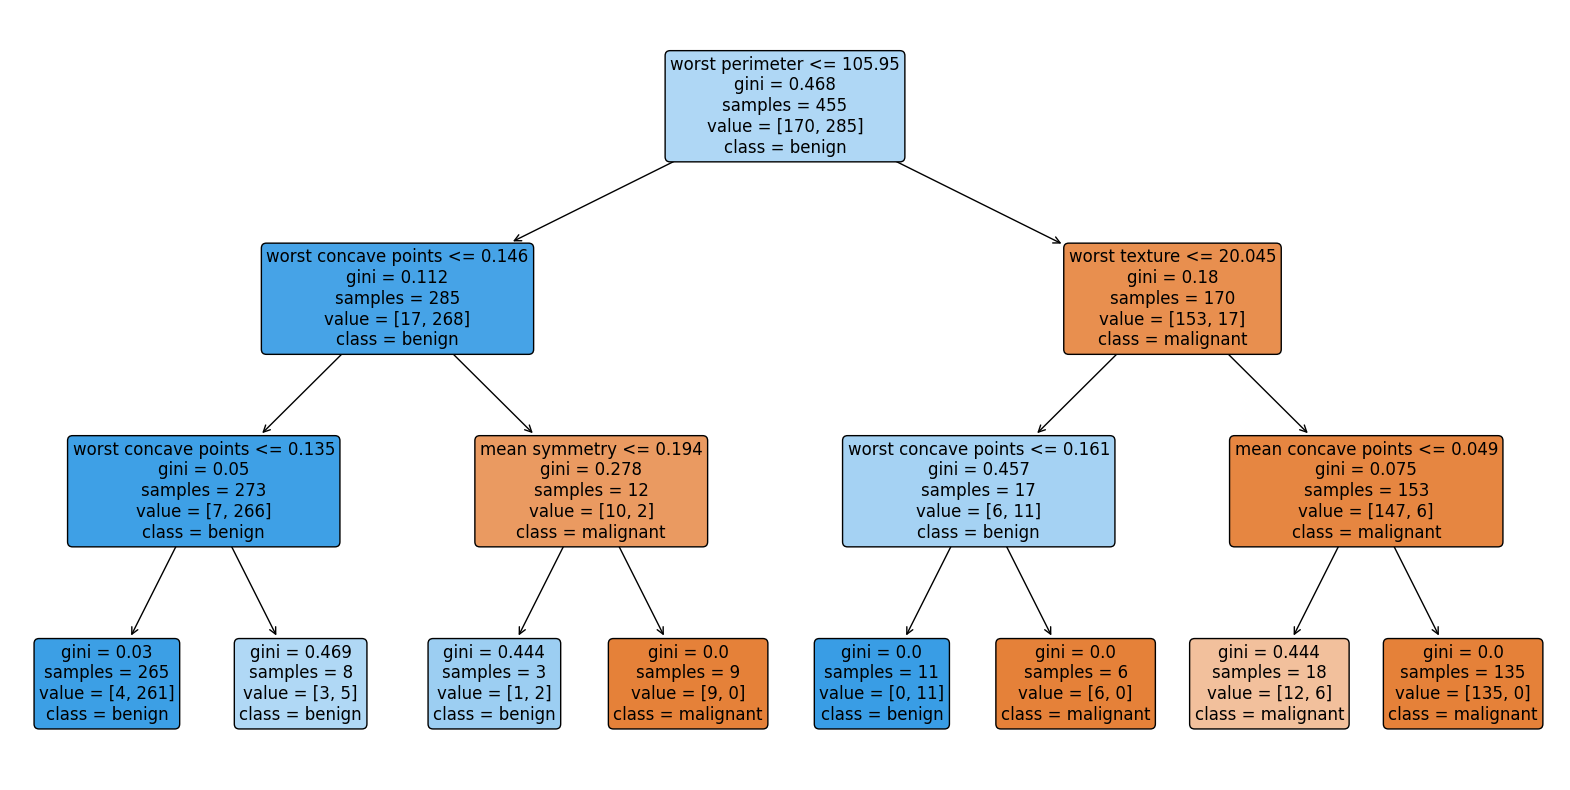

In [ ]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

dt_tree = DecisionTreeClassifier(max_depth=3)
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=cancer.feature_names,
              class_names=cancer.target_names,
              rounded=True, fontsize=12)
plt.show()
plt.close()

KNN 알고리즘

https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-KNNK-Nearest-Neighbor-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98

In [ ]:
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

Saving knn_image1.png to knn_image1.png


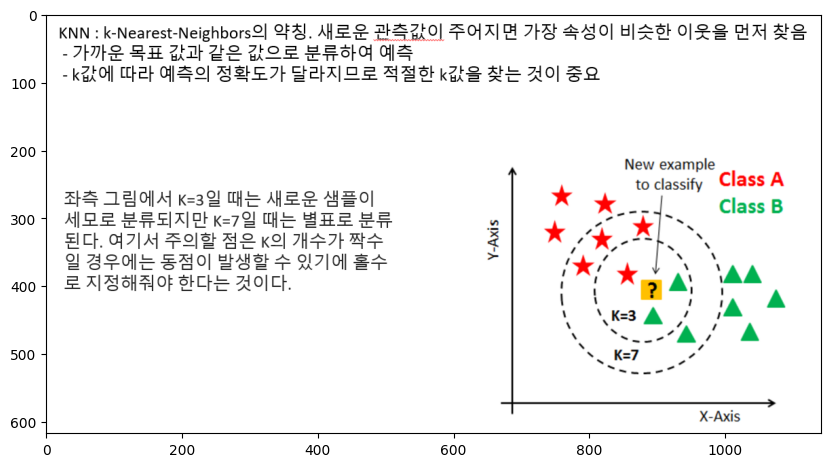

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from IPython.display import Image, display
# from PIL import Image as PImage
# import io

# Load the image
img = mpimg.imread('knn_image1.png')

# Display the image
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.show()

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Initialize the KNN classifier with k neighbors
k = 5
knn = KNeighborsClassifier(n_neighbors=k) # default 5,k값은 데이터, 과적합 상황, 이상치 등을 감안해서 설정

# Train the KNN model
knn.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={k}: {accuracy:.2f}")

Accuracy with k=5: 0.97


Q. 사이킷런 datasets에 있는 load_breast_cancer 데이터에 대하여 KNN(k=3) 알고리즘을 적용하여 분류 분석 모델링 및 평가를 수행하세요.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with k neighbors
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={k}: {accuracy:.2f}")


Accuracy with k=3: 0.94



### 서포트 벡터 머신(Support Vector Machines, SVM)

- 분류나 회귀, 이상치 탐지 등에 사용되는 강력한 머신러닝 알고리즘 중 하나입니다. SVM은 주로 분류 문제에 사용되며, 이 알고리즘의 핵심 아이디어는 데이터를 고차원 공간으로 변환하여 서로 다른 클래스 간의 최대 마진을 찾는 것입니다.

- SVM은 데이터를 두 개의 클래스로 나누는 결정 경계(결정 초평면이라고도 함)를 찾습니다. 이 결정 경계는 각 클래스의 가장 가까운 훈련 샘플(서포트 벡터라고 함)까지의 거리가 최대가 되는 선을 찾는 것을 목표로 합니다. 이를 '마진 최대화'라고 하며, 이 마진 최대화는 오류를 최소화하고 모델의 일반화 성능을 향상시키는 데 중요한 역할을 합니다.

- SVM은 선형 뿐만 아니라 비선형 분류 문제에도 사용할 수 있습니다. 비선형 문제를 해결하기 위해, SVM은 커널 트릭이라는 기법을 사용하여 데이터를 고차원 공간으로 변환하고, 그 고차원에서 선형 결정 경계를 찾습니다. 이 커널 트릭 덕분에 SVM은 복잡한 분류 문제를 처리할 수 있습니다.

- SVM은 작은 데이터셋에서도 잘 작동하며, 높은 차원의 데이터에 대해 강력한 성능을 발휘합니다. 그러나 데이터셋이 크거나 노이즈가 많은 경우, 그리고 데이터가 선형적으로 구분되지 않는 경우에는 다른 알고리즘(예: 랜덤 포레스트나 신경망)에 비해 성능이 떨어질 수 있습니다.

https://wooono.tistory.com/111

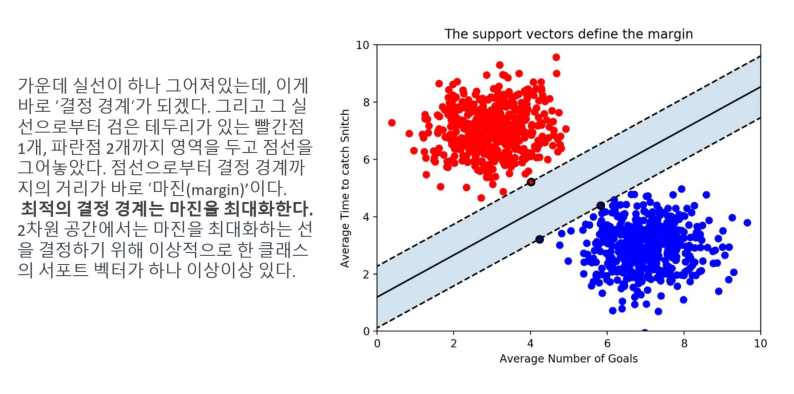

In [ ]:
# 이미지 파일 경로 (예: 'drive/My Drive/이미지_경로/이미지_파일명.jpg')
image_path = '/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/svm_image1.jpg'

# 이미지 불러오기
img = plt.imread(image_path)
plt.figure(figsize=(10,6))

# 이미지 표시
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

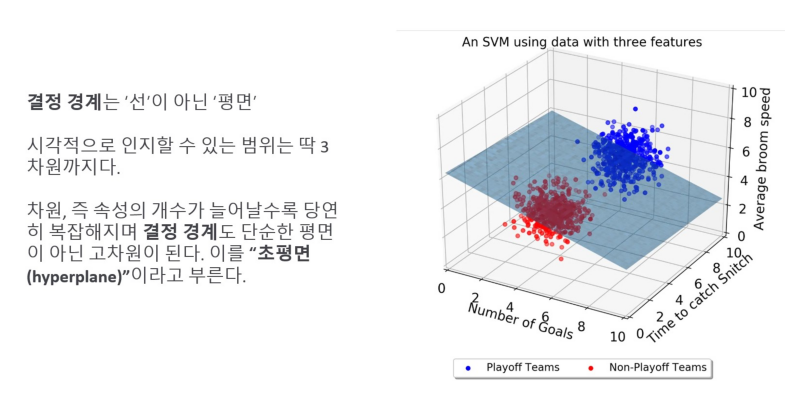

In [ ]:
# 이미지 파일 경로 (예: 'drive/My Drive/이미지_경로/이미지_파일명.jpg')
image_path = '/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/svm_image2.jpg'

# 이미지 불러오기
img = plt.imread(image_path)
plt.figure(figsize=(10,6))

# 이미지 표시
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

kernel
- SVM은 데이터를 분류하기 위해 결정 경계(Decision Boundary)라고 하는 분류선을 그리는데 이 때, kernel 매개변수는 이 결정 경계가 어떤 형태를 가질지 결정한다. kernel='linear'는 선형 결정 경계를 사용한다는 의미. 즉, 데이터가 선형적으로 분리될 수 있다고 가정하고, 그에 따른 최적의 직선을 찾는다. 이는 특징들이 선형 관계에 있다고 가정할 때 효과적. 다른 커널 유형으로는 poly(다항식), rbf(방사 기저 함수), sigmoid 등이 있으며, 이들은 비선형적 데이터를 처리하는 데 유용.

C=1.0
- C 매개변수는 SVM 분류기의 정규화 매개변수. 이 값은 모델이 각각의 데이터 포인트들을 얼마나 정확하게 분류할 것인지를 결정.
- C 값이 높으면 모델은 훈련 데이터에 대해 더 정확하게 분류하려고 하며 이는 결정 경계가 개별 데이터 포인트에 더 밀접하게 맞추어져 있는 상태를 의미. 하지만 이는 과적합(Overfitting)의 위험을 증가시킬 수 있다.
- 반대로 C 값이 낮으면 모델은 이러한 개별 데이터 포인트들에 덜 민감하게 된다. 즉, 결정 경계가 더 많은 데이터 포인트를 잘못 분류할 수 있지만, 일반적으로 더 일반화된(Generalized) 모델을 만들 수 있다.
- C=1.0은 기본값으로, 상대적으로 균형 잡힌 정규화 수준을 제공. 이 값은 문제에 따라 조정될 수 있으며, 특정 데이터셋에 대한 모델의 성능을 최적화하는 데 사용.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a SVM Classifier
svm = SVC(kernel='linear', C=1.0, random_state=42) # kernel='linear'는 선형 커널을 사용하겠다는 것이고, C=1.0은 정규화 매개변수

# Train the model using the training sets
svm.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = svm.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


In [ ]:
# 다양한 C 값에 대해 SVM 모델을 학습하고, 각 값에 대한 정확도를 비교
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of C values to try
C_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store the accuracy for each C value
accuracy_dict = {}

for C in C_values:
    # Create a SVM Classifier with different C values
    svm = SVC(kernel='linear', C=C, random_state=42)

    # Train the model using the training sets
    svm.fit(X_train, y_train)

    # Predict the response for the test dataset
    y_pred = svm.predict(X_test)

    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[C] = accuracy
    print(f"C: {C}, Accuracy: {accuracy:.2f}")

C: 0.01, Accuracy: 0.97
C: 0.1, Accuracy: 0.96
C: 1, Accuracy: 0.96
C: 10, Accuracy: 0.97
C: 100, Accuracy: 0.95



- 선형 커널 (SVC(kernel='linear')): 선형 커널은 간단하고 빠르며, 데이터가 선형적으로 구분될 때 좋은 성능을 보입니다. Wine 데이터셋에서 선형 커널이 적합한지 확인해보면, 일부 클래스 간의 분류가 충분하지 않을 수 있습니다.
- 다항식 커널 (SVC(kernel='poly')): 다항식 커널은 비선형적으로 분포된 데이터를 더 잘 처리할 수 있습니다. 차수가 증가함에 따라 모델이 더 복잡해지고, 데이터의 패턴을 더 잘 포착할 수 있지만, 과적합의 위험이 있습니다.
- RBF 커널 (SVC(kernel='rbf')): RBF 커널은 비선형적인 경계를 가진 데이터에서 가장 효과적입니다. Wine 데이터셋의 복잡한 패턴을 잘 포착할 수 있으며, 높은 성능을 기대할 수 있습니다.

Task1_0724. Wine 데이터셋에 대하여 SVM 모델에 3개의 커널을 적용하여 학습 및 평가 결과를 출력하세요.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드 및 분할
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# 데이터 스케일링 (SVM의 성능을 향상시키기 위해 필요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Kernel SVC
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



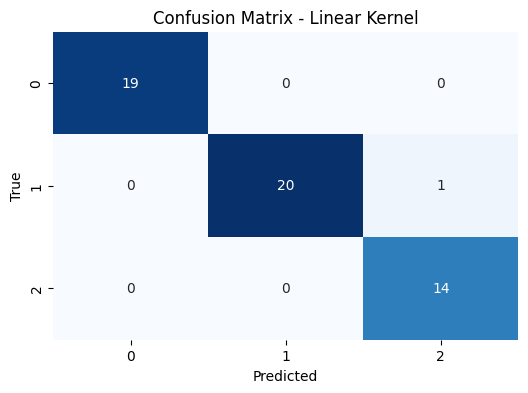

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 커널 SVC 모델 생성 및 학습
linear_svc = SVC(kernel='linear', random_state=42)
linear_svc.fit(X_train, y_train)

# 예측
y_pred_linear = linear_svc.predict(X_test)

# 성능 평가
print("Linear Kernel SVC")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Polynomial Kernel SVC
[[17  2  0]
 [ 0 21  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



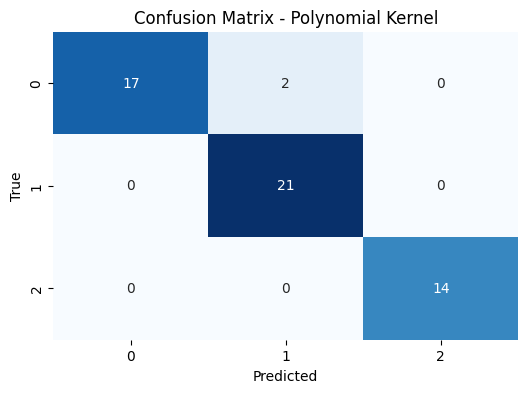

In [ ]:
# 다항식 커널 SVC 모델 생성 및 학습
poly_svc = SVC(kernel='poly', degree=3, random_state=42)
poly_svc.fit(X_train, y_train)

# 예측
y_pred_poly = poly_svc.predict(X_test)

# 성능 평가
print("Polynomial Kernel SVC")
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Polynomial Kernel")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


RBF Kernel SVC
[[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



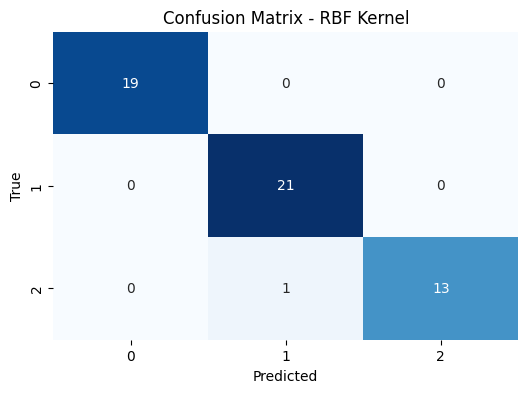

In [ ]:
# RBF 커널 SVC 모델 생성 및 학습
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train, y_train)

# 예측
y_pred_rbf = rbf_svc.predict(X_test)

# 성능 평가
print("RBF Kernel SVC")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


실제 평가 결과를 통해 각 커널의 성능을 비교해 보면 다음과 같은 결론을 얻을 수 있습니다:

- 선형 커널은 데이터가 선형적으로 잘 구분될 때 적합하며, 빠른 연산이 필요할 때 유용합니다.
- 다항식 커널은 비선형적인 패턴을 포착할 수 있으며, 모델의 복잡성을 조절할 수 있습니다. 적절한 차수를 선택해야 합니다.
- RBF 커널은 비선형적이고 복잡한 데이터에서 가장 좋은 성능을 보일 수 있습니다.

####  앙상블 학습

* 앙상블 학습의 유형은 보팅, 배깅, 부스팅 세가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
* 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이다.
* 정형 데이터의 예측 분석 영역에서는 매우 높은 예측 성능. Bagging 과 Boosting
* 배깅 방식의 대표인 Random Forest는 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성 등으로 애용.
* 부스팅의 효시는 Gradient Boosting, 한 단계 발전시키면서도 시간 단축시킨 XgBoost, LightGBM이 정형 데이터의 분류 영역에서
  활용도 확대
* 앙상블의 앙상블이라고 불리는 스태킹 기법
* 앙상블의 기본 알고리즘은 결정 트리

Voting Classifier
- 하드 보팅 : 다수결 원칙, 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더해서 평균하고 이들 중 가장 높은 레이블 값을 최종 보팅 결과값으로 선정

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

# print(cancer.data)
# print(cancer.target)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
data_df.info()

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임.
lr_clf = LogisticRegression(max_iter=10000, solver='lbfgs')
knn_clf = KNeighborsClassifier(n_neighbors=9)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9649
KNeighborsClassifier 정확도: 0.9649


#### Random Forest
여러 개의 의사결정 트리(Decision Trees)를 조합하여 작동하는 앙상블 학습 방법의 하나로 다수의 의사결정 트리를 생성하고, 각각의 트리가 데이터에 대한 예측을 수행한 후, 이 예측들을 결합하여 최종 예측 결과를 도출

베깅(Bagging), 또는 부트스트랩 어그리게이팅(Bootstrap Aggregating)은 앙상블 학습 방법 중 하나로, 모델의 분산을 줄이고 오버피팅을 방지하기 위해 사용.

베깅의 핵심 아이디어와 방식

- 부트스트랩 샘플링:
베깅은 원본 훈련 데이터 세트에서 복원 추출 방식(하나의 데이터 포인트를 여러 번 샘플링할 수 있음)을 사용하여 여러 개의 서브셋(부트스트랩 샘플)을 생성. 각 부트스트랩 샘플은 원본 데이터 세트와 크기는 같지만, 일부 데이터는 중복되고 일부 데이터는 누락될 수 있다.
- 독립적인 모델 훈련:
생성된 각 서브셋은 독립적인 모델(예: 의사결정 트리)을 훈련시키는 데 사용. 이렇게 함으로써, 각 모델은 데이터의 다른 측면을 학습하게 된다.
- 결과의 결합:
훈련된 모든 모델의 예측 결과는 결합되어 최종 결과를 생성.
분류 문제의 경우, 일반적으로 다수결(voting) 방식이 사용되며, 회귀 문제의 경우에는 평균이 사용.

베깅의 장점
- 분산 감소: 여러 모델의 예측을 결합함으로써 개별 모델이 가질 수 있는 높은 분산을 줄일 수 있다.
- 오버피팅 방지: 부트스트랩 샘플링으로 인해 각 모델이 훈련 데이터의 다른 측면을 학습하므로, 오버피팅을 방지하는 데 도움이 된다.
- 병렬 처리 가능: 각 모델은 독립적으로 훈련되므로, 병렬 처리가 가능해져 계산 효율성이 높다.

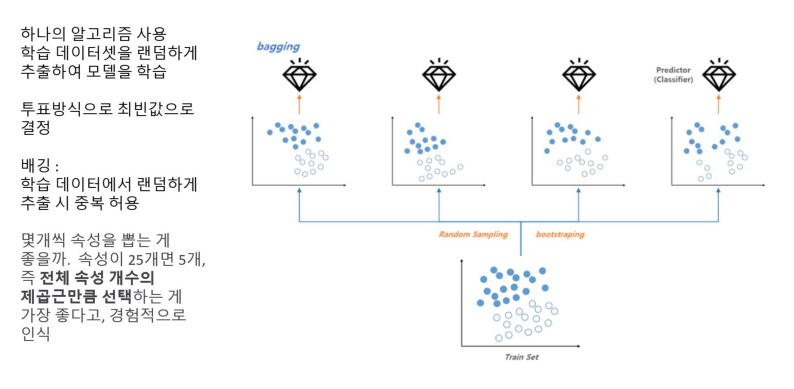

In [ ]:
# 이미지 파일 경로 (예: 'drive/My Drive/이미지_경로/이미지_파일명.jpg')
image_path = '/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/rf_image1.jpg'

# 이미지 불러오기
img = plt.imread(image_path)
plt.figure(figsize=(10,6))

# 이미지 표시
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


주요 하이퍼파라미터

n_estimators:
- 설명: 랜덤포레스트에 포함될 결정 트리의 개수를 지정합니다.
- 기본값: 100
- 영향: 트리의 개수가 많을수록 모델의 안정성과 성능이 향상될 수 있지만, 연산 비용도 증가합니다.

max_depth:
- 설명: 각 트리의 최대 깊이를 설정합니다.
- 기본값: None (리프 노드가 순수해질 때까지 또는 min_samples_split보다 적은 샘플을 가질 때까지 계속 분할)
- 영향: 깊이가 깊을수록 모델이 복잡해지고 과적합할 가능성이 커집니다.

min_samples_split:
- 설명: 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
- 기본값: 2
- 영향: 큰 값은 과적합을 방지하는 데 도움이 됩니다.

min_samples_leaf:
- 설명: 리프 노드에 있어야 하는 최소 샘플 수입니다.
- 기본값: 1
- 영향: 큰 값은 과적합을 방지하고, 트리의 일반화 능력을 향상시킬 수 있습니다.

max_features:
- 설명: 각 분할에서 고려할 최대 특성 수입니다.
- 옵션: auto, sqrt, log2, 또는 정수 값
- 기본값: auto (모든 특성을 사용)
- 영향: 특성 수가 적을수록 모델의 다양성이 증가하지만, 너무 적으면 성능이 떨어질 수 있습니다.

Task2_0724. wind dataset으로 랜덤포레스트를 적용하여 모델링 및 평가를 아래의 하이퍼 파라미터를 이용하여 수행한 후 최적의 하이퍼파라미터를 구하세요.

- 'n_estimators': [50, 100, 200],
- 'max_depth': [None, 10, 20],
- 'max_features': ['auto', 'sqrt', 'log2'],
- 'min_samples_split': [2, 5, 10],
- 'min_samples_leaf': [1, 2, 4]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 및 분할
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)



Task3_0724. 주어진 데이터셋에 대하여 모델의 성능을 개선하시고 개선한 주요 포인트에 대하여 설명하세요.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

# 2. 결측치 처리
data.dropna(inplace=True)

# 3. 이상치 제거 (여기서는 'capital-gain'과 'capital-loss'에서 극단적인 값들을 이상치로 가정)
Q1 = data['capital-gain'].quantile(0.25)
Q3 = data['capital-gain'].quantile(0.75)
IQR = Q3 - Q1
capital_gain_outliers = data[(data['capital-gain'] < (Q1 - 1.5 * IQR)) | (data['capital-gain'] > (Q3 + 1.5 * IQR))]

Q1 = data['capital-loss'].quantile(0.25)
Q3 = data['capital-loss'].quantile(0.75)
IQR = Q3 - Q1
capital_loss_outliers = data[(data['capital-loss'] < (Q1 - 1.5 * IQR)) | (data['capital-loss'] > (Q3 + 1.5 * IQR))]

data = data.drop(capital_gain_outliers.index)
data = data.drop(capital_loss_outliers.index)

# 4. 파생변수 작성
data['capital_diff'] = data['capital-gain'] - data['capital-loss']
data['age_binned'] = pd.cut(data['age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'senior'])
data = pd.get_dummies(data, columns=['age_binned'], drop_first=True)

# 5. 범주형 변수 인코딩
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# 6. 변수 선택 및 데이터 분리
X = data.drop('income_>50K', axis=1)
y = data['income_>50K']

# 7. 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. 학습용과 테스트용 데이터셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. 모델들 생성
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='lbfgs' ,random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# 10. 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)
    print('\n' + '='*60 + '\n')


Model: Logistic Regression
Accuracy: 0.85
Confusion Matrix:
[[3945  262]
 [ 511  522]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.94      0.91      4207
        True       0.67      0.51      0.57      1033

    accuracy                           0.85      5240
   macro avg       0.78      0.72      0.74      5240
weighted avg       0.84      0.85      0.84      5240



Model: Random Forest
Accuracy: 0.84
Confusion Matrix:
[[3907  300]
 [ 520  513]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.91      4207
        True       0.63      0.50      0.56      1033

    accuracy                           0.84      5240
   macro avg       0.76      0.71      0.73      5240
weighted avg       0.83      0.84      0.84      5240



Model: SVM
Accuracy: 0.85
Confusion Matrix:
[[4004  203]
 [ 574  459]]
Classification Report:
              precision    recall 

### 로지스틱 회귀(Logistic Regression)

- 분류 문제를 해결하기 위한 알고리즘으로, 선형 회귀와 마찬가지로 입력 특성의 가중치 합을 계산하는데, 선형 회귀와 달리 결과를 이진 분류(0 또는 1, 참 또는 거짓 등)에 사용할 수 있는 확률로 변환.

- 로지스틱 회귀는 선형 회귀와 비슷하게 모델의 예측과 실제 값 사이의 차이를 최소화하도록 가중치를 학습. 하지만 로지스틱 회귀는 선형 회귀와는 달리 결과를 0과 1 사이의 값으로 제한하는 로지스틱 함수(또는 시그모이드 함수)를 사용.

- 로지스틱 회귀는 각 클래스에 속할 확률을 제공하며, 특정 임계값(일반적으로 0.5)을 초과하는 경우 데이터 포인트를 해당 클래스에 할당. 이는 이진 분류뿐만 아니라 다중 클래스 분류에도 적용될 수 있다(이 경우에는 일대다(OvR) 또는 다항 로지스틱 회귀를 사용할 수 있다).
  - 일대다(OvR): 각 클래스에 대해 개별 이진 분류기를 학습시키고, 가장 높은 확률을 제공하는 분류기의 클래스로 분류합니다.
  - 다항 로지스틱 회귀: 소프트맥스 함수를 사용하여 각 클래스에 대한 확률을 계산하고, 가장 높은 확률을 가지는 클래스로 분류합니다.
- 로지스틱 회귀는 출력이 확률이기 때문에, 결과의 해석이 직관적이며 모델의 예측이 불확실한 경우에도 그 정도를 측정할 수 있다. 또한 로지스틱 회귀는 선형 회귀보다 이상치에 덜 민감하며, 모델이 과적합되는 것을 방지하기 위해 규제를 적용할 수 있다는 장점도 있다.

- 로지스틱 함수, 또는 시그모이드 함수는 S-자 형태를 띠는 함수로, 실수 입력값을 0과 1 사이의 출력값으로 변환하는 데 사용. 이 함수는 머신러닝, 특히 이진 분류 문제에서 중요한 역할을 한다.

- 로지스틱 함수의 정의

    - f(x) = 1 / (1 + e^-x)

    - e는 자연 상수(약 2.71828). x는 어떤 실수 값도 가능하며, -무한대에서 무한대까지의 범위를 가지며 이 함수는 모든 실수 입력에 대해 0과 1 사이의 값을 반환.

    - 함수가 결과를 0과 1 사이로 제한하기 때문에, 이는 확률에 대해 논의할 때 특히 유용. 로지스틱 회귀 분석에서 이 함수는 선형 함수의 결과를 확률로 변환하는데 사용.

    - 입력값 x가 커질수록 로지스틱 함수의 출력은 1에 가까워지고, x가 작아질수록 출력은 0에 가까워진다. x가 0일 때 로지스틱 함수의 값은 0.5입니다. 이러한 특성 때문에 로지스틱 함수는 이진 분류 문제에 널리 사용.

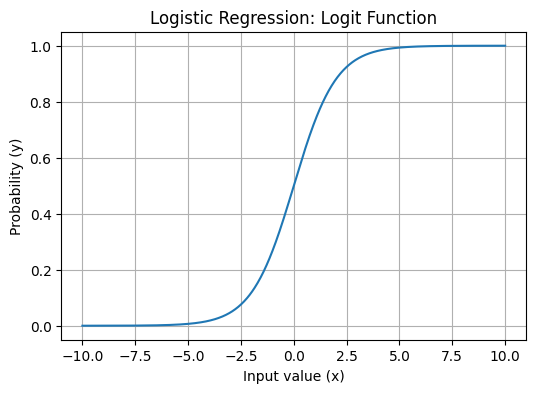

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 로짓 함수 정의
def logit_function(x):
    return 1 / (1 + np.exp(-x))

# 입력 값 범위
x = np.linspace(-10, 10, 1000)

# 로짓 함수 적용
y = logit_function(x)

# 시각화
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.title("Logistic Regression: Logit Function")
plt.xlabel("Input value (x)")
plt.ylabel("Probability (y)")
plt.grid(True)
plt.show()


In [ ]:
# 로지스틱 회귀
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 표준편차 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

- max_iter=100:
로지스틱 회귀 모델이 데이터에 대해 수렴하지 않을 때, 반복 횟수를 늘려서 해결할 수 있습니다. 기본값은 100이지만, 필요한 경우 이 값을 늘릴 수 있습니다. 최적화 과정은 모델의 가중치를 업데이트하여 비용 함수를 점진적으로 최소화하는 과정입니다.
  - 초기화: 모델 파라미터(가중치와 절편)를 임의의 값으로 초기화합니다.
  - 예측: 현재 파라미터 값을 사용하여 훈련 데이터에 대한 예측을 수행합니다.
  - 오차 계산: 예측값과 실제값 사이의 오차를 계산합니다.
  - 비용 함수 계산: 현재 파라미터 값에 대한 비용 함수의 값을 계산합니다.
  - 기울기 계산: 비용 함수를 최소화하기 위해 필요한 기울기(그래디언트)를 계산합니다.
  - 파라미터 업데이트: 기울기를 사용하여 파라미터를 업데이트합니다.

- solver='lbfgs':
'lbfgs(Limited-memory Broyden-Fletcher-Goldfarb-Shanno)'는 대부분의 경우에 빠르고 안정적으로 수렴하는 알고리즘입니다. 특히, 큰 데이터셋과 많은 특성을 처리할 때 유용합니다. L-BFGS는 'Limited-memory'로, 메모리 사용을 최소화합니다. 이는 특히 고차원의 문제에서 중요합니다. 메모리 사용을 줄이기 위해 이전 단계의 기울기와 위치 정보만을 사용합니다.

- random_state=42:
모델의 학습 결과를 재현 가능하게 하기 위해 설정합니다. 이는 실험을 반복하고 결과를 비교할 때 유용합니다.

In [ ]:
from sklearn.metrics import accuracy_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
lr_clf = LogisticRegression(max_iter=100, solver='lbfgs', random_state=42)
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))


accuracy: 0.977


In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


In [ ]:
best_grid_clf = grid_clf.best_estimator_ # best_params_ 적용
pred1 = best_grid_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('로지스틱 예측 정확도:{0:.4f}'.format(accuracy))

로지스틱 예측 정확도:0.9883


### 나이브 베이즈 분류 (Naive Bayes Classification)

- 나이브 베이즈 분류기(Naive Bayes Classifier)는 베이즈의 정리를 적용한 간단한 확률적 분류 알고리즘입니다. 이 알고리즘은 모든 특성 값들이 서로 독립임을 가정하는데, 이 가정 때문에 '나이브(단순한)'라는 이름이 붙었습니다.

- 나이브 베이즈 분류기 작동 방식:

    - 각 클래스의 사전 확률을 계산합니다. 즉, 학습 데이터에서 각 클래스의 비율을 계산합니다.

    - 각 특성에 대해, 각 클래스에서 그 특성의 확률을 계산합니다. 이를 "우도(likelihood)"라고 부릅니다.

    - 새로운 데이터 포인트를 분류하려면, 모든 클래스에 대해 특성 값들의 우도를 곱하여 클래스의 사전 확률을 곱한 값(즉, 특성 값들이 주어졌을 때 클래스의 확률)을 계산합니다.

    - 마지막으로, 가장 높은 확률을 가진 클래스를 예측 클래스로 선택합니다.

- 작동 원리를 좀 더 직관적으로 설명하자면, 그것은 '투표'와 같은 원리로 이해할 수 있습니다. 각 특성이 클래스를 결정하는데 '표'를 주는 것처럼 생각해보세요.

    - 사전 확률 계산: 먼저, 훈련 데이터에서 각 클래스의 비율을 계산합니다. 이를 각 클래스의 '기본 표'라고 생각할 수 있습니다. 예를 들어, 100개의 데이터 중에 30개가 클래스 A, 70개가 클래스 B에 속한다면, 클래스 A의 사전 확률은 0.3, 클래스 B의 사전 확률은 0.7입니다.

    - 특성 별 확률 계산 (우도 계산): 각 클래스에서 각 특성의 확률을 계산합니다. 이는 각 특성이 클래스에 '표'를 주는 방식을 결정합니다. 예를 들어, '키'라는 특성이 있는데, 클래스 A에서는 '키가 큰' 사람의 비율이 높고, 클래스 B에서는 '키가 작은' 사람의 비율이 높다면, '키가 큰' 사람은 클래스 A에, '키가 작은' 사람은 클래스 B에 '표'를 줄 것입니다.

    - 후보자 별 투표 집계: 새로운 데이터 포인트가 주어졌을 때, 모든 특성이 각 클래스에 '표'를 주는 방식을 따라 '표'를 계산합니다. 즉, 모든 특성의 '표'를 모두 더하고, 그것에 사전 확률(기본 표)을 더한 것이 각 클래스의 최종 '표'가 됩니다.

    - 승리자 선정: 가장 많은 '표'를 받은 클래스가 새로운 데이터 포인트의 클래스가 됩니다.

- 이처럼, 나이브 베이즈 분류기는 각 특성이 독립적으로 각 클래스에 '표'를 주는 것처럼 작동하므로, 이를 '나이브(단순한)' 베이즈 분류기라고 부릅니다.

- 나이브 베이즈 분류기는 텍스트 분류(예: 스팸 메일 분류)에서 많이 사용되며, 계산이 간단하고 빠르며, 큰 데이터셋에 대해서도 잘 동작하는 특징을 가지고 있습니다. 하지만 나이브 베이즈의 '나이브'한 가정, 즉 모든 특성이 독립적이라는 가정은 실제 데이터에는 잘 맞지 않을 수 있으므로 이 점을 고려할 필요가 있습니다.
- 나이브 베이즈는 스팸 메일 필터, 텍스트 분류, 감정 분석, 추천 시스템 등에 광범위하게 활용되는 분류 기법입니다. 나이브 베이즈 분류에 대해서 배우기 위해서는 베이즈 정리를 먼저 알아야 합니다.

- 나이브 베이즈의 장점

    - 간단하고, 빠르며, 정확한 모델입니다.
    - computation cost가 작습니다. (따라서 빠릅니다.)
    - 큰 데이터셋에 적합합니다.
    - 연속형보다 이산형 데이터에서 성능이 좋습니다.
    - Multiple class 예측을 위해서도 사용할 수 있습니다.

- 단점
    - feature 간의 독립성이 있어야 합니다. 하지만 실제 데이터에서 모든 feature가 독립인 경우는 드뭅니다. 장점이 많지만 feature가 서로 독립이어야 한다는 크리티컬한 단점이 있습니다.
    - feature간 독립성이 있다는 말은 feature간에 서로 상관관계가 없다는 뜻입니다.
    - X1과 X2라는 feature가 있을 때 X1이 증가하면 X2도 같이 증가한다고 합시다. 그럼 X1과 X2는 서로 상관관계가 있다고 말할 수 있고, 이는 X1과 X2가 독립성이 없다는 뜻입니다.
    - X1과 X2가 독립성이 있으려면 X1이 증가하든 말든, X2에는 아무런 영향을 미치지 않아야 합니다. 하지만 우리가 얻을 수 있는 데이터에서는 feature간의 독립성이 항상 보장되지는 않습니다.
    - 나이브 베이즈 모델은 feature간 독립성이 있다는 가정하에 성립되는 모델이기 때문에 실생활에서 바로 적용하기는 어려움있습니다.

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98-Naive-Bayes-Classification

#### 나이브 베이즈 모델을 사용하는 경우
텍스트 분류 및 필터링:
  - 스팸 메일 필터링: 이메일이 스팸인지 아닌지를 분류하는 데 널리 사용됩니다. 단어의 발생 빈도에 기반하여 각 이메일이 스팸일 확률을 계산합니다.
  - 감정 분석: 텍스트에서 감정을 분석하는 데 유용합니다. 예를 들어, 리뷰가 긍정적인지 부정적인지 분류할 때 사용됩니다.
  - 문서 분류: 뉴스 기사, 블로그 글 등을 분류하는 데 사용됩니다.

의료 진단:
  - 질병 진단: 특정 증상이 있을 때 질병이 있을 확률을 계산하여 진단을 도와줍니다.

추천 시스템:
  - 제품 추천: 사용자 행동에 기반하여 제품을 추천할 때 사용됩니다.

이상 탐지:
  - 이상 감지: 네트워크 트래픽에서 이상한 활동을 감지하는 데 유용합니다.

단어 예측 및 자동 완성:
 - 자연어 처리: 특정 단어가 주어졌을 때 다음 단어를 예측하거나 문장을 자동 완성할 때 사용됩니다.

베이즈 정리는 새로운 증거가 주어졌을 때 사전 확률을 어떻게 업데이트해야 하는지를 나타내는 중요한 확률론적 도구입니다. 이는 특히 의학, 금융, 머신러닝 등 다양한 분야에서 널리 사용됩니다. 베이즈 정리를 통해 조건부 확률을 계산하면 더욱 정확한 의사 결정을 할 수 있습니다.

베이즈 정리의 수식
베이즈 정리는 다음과 같은 수식으로 표현됩니다:
$P(A∣B)= P(B)P(B∣A)⋅P(A)$

여기서:

P(A∣B): B가 주어졌을 때 A가 발생할 확률 (사후 확률, Posterior Probability)

P(B∣A): A가 주어졌을 때 B가 발생할 확률 (우도, Likelihood)

P(A): A가 발생할 확률 (사전 확률, Prior Probability)

P(B): B가 발생할 확률 (증거 확률, Marginal Likelihood)

주어진 정보
- 질병에 걸릴 확률 P(D): 1% (0.01)
- 테스트가 양성일 확률 P(T∣D): 99% (0.99)
- 테스트가 음성일 확률 P(T∣¬D): 5% (0.05)
- 전체 인구에서 테스트가 양성일 확률 P(T): 5.94% (0.0594)

목표
테스트 결과가 양성일 때, 실제로 질병에 걸릴 확률 P(D∣T)를 계산합니다.

베이즈 정리 적용

$P(D∣T)= P(T∣D)⋅P(D)/P(T)$

각 확률을 대입해 계산해보면:

- $P(T∣D)=0.99$
- $P(D)=0.01$
- $P(T)=0.0594$

$P(D∣T)= 0.99×0.01/0.0594 = 0.0099/0.0594 ≈0.167$

Q. 어떤 마을 전체 사람들의 10.5%가 암 환자이고, 89.5%가 암 환자가 아닙니다. 이 마을의 모든 사람에 대해 암 검진을 실시했다고 합시다. 암 검진시 양성 판정, 음성 판정 결과가 나올 수 있습니다. 하지만 검진이 100% 정확하지는 않고 약간의 오차가 있습니다. 암 환자 중 양성 판정을 받은 비율은 90.5%, 암 환자 중 음성 판정을 받은 비율은 9.5%, 암 환자가 아닌 사람 중 양성 판정을 받은 비율은 20.4%, 암 환자가 아닌 사람 중 음성 판정을 받은 비율은 79.6%입니다. 어떤 사람이 양성 판정을 받았을 때 이 사람이 암 환자일 확률은 얼마일까요?

In [ ]:
# 사전 확률 (P(Cancer), P(No Cancer))
P_Cancer = 0.105
P_No_Cancer = 0.895

# 검사의 민감도와 특이도 (P(Positive|Cancer), P(Negative|Cancer), P(Positive|No Cancer), P(Negative|No Cancer))
P_Positive_Cancer = 0.905 # 암 환자 중 양성 판정, 민감도
P_Negative_Cancer = 0.095 # 암 환자 중 양성 판정, 1 - 특이도
P_Positive_No_Cancer = 0.204 # 암 환자가 아닌 사람 중 양성 판정
P_Negative_No_Cancer = 0.796 # 암 환자가 아닌 사람 중 음성 판정

# 베이즈 정리를 사용하여 P(Cancer|Positive)를 계산
# P(Cancer|Positive) = P(Positive|Cancer) * P(Cancer) / P(Positive)
P_Positive = P_Positive_Cancer * P_Cancer + P_Positive_No_Cancer * P_No_Cancer
P_Cancer_Positive = P_Positive_Cancer * P_Cancer / P_Positive

print(f"양성 판정을 받은 사람이 암 환자일 확률: {P_Cancer_Positive}")

양성 판정을 받은 사람이 암 환자일 확률: 0.34230291241151994


Q1_0123. 날씨에 따른 경기 실행 과거 데이터가 아래와 같다.
베이즈 분류(Bayesian classification)를 사용하여 "날씨가 overcast일 때 경기를 할 확률"을 계산하세요.

data = {'Weather': ['Sunny', 'Overcast', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Overcast', 'Sunny'],
        'Play': ['No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes']}

In [ ]:
# 주어진 데이터
data = {'Weather': ['Sunny', 'Overcast', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Overcast', 'Sunny'],
        'Play': ['No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes']}

# 데이터를 분석하여 확률 계산
# P(Overcast|Play)): 경기가 있는 날에 날씨가 Overcast일 확률
# P(Play): 경기가 있는 날의 확률
# P(Overcast)): 날씨가 Overcast일 확률
# P(Play|Overcast) 계산
# p_play_given_overcast = (p_overcast_given_play * p_play) / p_overcast

# 각 날씨 유형과 경기 여부에 대한 빈도 수 계산
weather_counts = {'Sunny': 0, 'Overcast': 0, 'Rainy': 0}
play_counts = {'Yes': 0, 'No': 0}
overcast_play_count = 0

for i in range(len(data['Weather'])):
    weather = data['Weather'][i]
    play = data['Play'][i]

    weather_counts[weather] += 1
    play_counts[play] += 1

    if weather == 'Overcast' and play == 'Yes':
        overcast_play_count += 1

# P(Overcast|Play)
p_overcast_given_play = overcast_play_count / play_counts['Yes']

# P(Play)
p_play = play_counts['Yes'] / len(data['Weather'])

# P(Overcast)
p_overcast = weather_counts['Overcast'] / len(data['Weather'])

# P(Play|Overcast) 계산
p_play_given_overcast = (p_overcast_given_play * p_play) / p_overcast
p_overcast_given_play, p_play, p_overcast, round(p_play_given_overcast,2)



(0.4, 0.5, 0.3, 0.67)

In [ ]:
import pandas as pd

# 가상의 날씨 데이터 생성
data = {'Weather': ['Sunny', 'Overcast', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Overcast', 'Sunny'],
        'Play': ['No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes']}

df = pd.DataFrame(data)
# print(df)

# 날씨가 Overcast일 때 경기를 하는 경우의 수 계산
overcast_play_yes = df[(df['Weather'] == 'Overcast') & (df['Play'] == 'Yes')].shape[0]
print(overcast_play_yes)

# 날씨가 Overcast인 전체 경우의 수 계산
overcast_total = df[df['Weather'] == 'Overcast'].shape[0]
print(overcast_total)

# 베이즈 분류를 사용하여 확률 계산
# P(Play=Yes | Weather=Overcast) = (P(Weather=Overcast | Play=Yes) * P(Play=Yes)) / P(Weather=Overcast)
probability = overcast_play_yes / overcast_total

print(f"날씨가 Overcast일 때 경기를 할 확률: {probability:.2f}")


2
3
날씨가 Overcast일 때 경기를 할 확률: 0.67


In [ ]:
# sklearn.datasets의 make_classification 함수를 사용하여 10개의 샘플과 5개의 특성을 가진 합성 분류 데이터 세트를 생성

from sklearn import datasets
datasets.make_classification(n_samples=10, n_features=5)

(array([[ 1.93161608,  1.84671028,  0.88928429, -0.00864585, -2.48652396],
        [ 1.14476384, -1.62002154,  0.45894755,  1.63706693,  1.70429039],
        [-2.83349026,  0.02646871,  0.47383558, -1.64217901,  0.44504732],
        [-1.0633002 ,  0.85249038, -0.19430406, -1.12597518, -0.81940173],
        [-0.28239536, -1.06733914, -0.39133789,  0.4836468 ,  1.29701349],
        [ 0.53883436, -0.61730604,  2.24707501,  0.6826982 ,  0.63217531],
        [-1.08637479,  0.55798307, -0.23436093, -0.96104762, -0.47073541],
        [-0.06872957, -0.51662484,  1.3710339 ,  0.27310184,  0.61637704],
        [-1.28686253, -2.28823935, -0.57621888,  0.64579095,  2.89511646],
        [ 2.18546564, -0.10376125,  1.05755741,  1.31703199, -0.24568818]]),
 array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1]))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.model_selection import train_test_split

# sklearn.datasets의 make_classification 함수를 사용하여 1000개의 샘플과 10개의 특성을 가진 합성 분류 데이터 세트를 생성
X, y = datasets.make_classification(n_samples=1000, n_features=10, random_state=8)
print(X[:3],'\n')
print(y[:3],'\n')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# GaussianNB 클래스의 인스턴스를 생성
nb = GaussianNB()

# fit 메서드를 사용하여 모델을 훈련 데이터에 적합
nb.fit(X_train, y_train)

# 훈련된 모델을 사용하여 X_test에 대한 예측을 수행
predictions = nb.predict(X_test)
print("Predictions:", predictions,'\n')
print(y_test,'\n')
from sklearn.metrics import accuracy_score
# accuracy_score 함수를 사용하여 모델의 정확도를 계산
accuracy = accuracy_score(y_test, predictions)
print(f"GaussianNB Accuracy: {accuracy}")

[[-0.49317802 -0.88011788  1.17773615 -0.58036092  0.1500373   1.05214074
  -0.36044212 -0.98712265 -0.99402129 -0.81999775]
 [-1.03439597  1.23321442 -0.6018178   0.02062418  0.32236544  0.686073
  -0.22743465 -0.95339576 -0.80576554 -0.92878681]
 [ 0.58183629  1.17457336  1.13990086 -0.12022716 -0.81723851 -1.27023374
  -0.79672808  1.82884458  0.16722037  1.80062741]] 

[0 0 1] 

Predictions: [0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0
 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0] 

[0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1

Q2_0123. 사이킷런 datasets에 있는 load_breast_cancer 데이터에 대하여 GaussianNB 알고리즘을 적용하여 분류 분석 모델링 및 평가를 수행하세요.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 데이터 로드
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 데이터 분할: 훈련 세트와 테스트 세트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 가우시안 나이브 베이즈 모델 생성 및 훈련
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = gnb.predict(X_test)

# 훈련된 모델을 사용하여 X_test에 대한 예측을 수행
print("Predictions:", y_pred,'\n')
print("Actual:", y_test,'\n')
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Predictions: [0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1] 

Actual: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1] 

Accuracy: 0.92


random_state 매개변수는 일부 머신러닝 모델에서 결과의 재현성을 보장하기 위해 사용.

- 이 매개변수는 모델이 데이터를 분할하거나, 무작위로 요소를 선택할 때 동일한 시퀀스의 무작위성을 보장하기 위해 사용. 하지만 모든 머신러닝 모델이나 알고리즘에서 random_state가 필요하거나 사용되는 것은 아니며 random_state의 사용 여부는 알고리즘의 특성과 구현에 따라 다르다.

- DecisionTreeClassifier와 같은 의사결정 트리 모델에서 random_state가 사용되는 이유는 의사결정 트리는 훈련 과정에서 데이터 포인트를 분할하는 방식에 무작위성이 관여할 수 있다. 특히 트리가 성장할 때 여러 후보 분할 중에서 선택해야 할 때 무작위성이 적용될 수 있다. random_state를 설정함으로써 모델의 훈련이 동일한 조건에서 반복될 때마다 일관된 트리 구조를 생성할 수 있다.
- GaussianNB (가우시안 나이브 베이즈 분류기)는 다음과 같은 이유로 random_state 매개변수가 필요하지 않다. 가우시안 나이브 베이즈는 확률적 분류 알고리즘으로, 훈련 데이터의 특성에 따라 클래스의 조건부 확률을 계산. 이 알고리즘은 훈련 데이터에서 직접 계산되는 확률 분포를 기반으로 하며, 훈련 과정에서 무작위성이 관여하지 않습니다. 따라서 동일한 데이터 세트에 대해 항상 동일한 결과를 생성.
- random_state는 알고리즘이나 모델이 무작위성을 포함하는 훈련 과정을 가질 때 필요한 매개변수. 가우시안 나이브 베이즈는 무작위성을 포함하지 않으므로 random_state가 필요하지 않다.

### GBM(Gradient Boosting Machine)
GBM(Gradient Boosting Machine)은 강력한 머신 러닝 알고리즘 중 하나로, 여러 개의 약한 학습기(weak learners), 특히 결정 트리(decision trees)를 순차적으로 학습하고 결합하여 성능을 향상시키는 앙상블(ensemble) 기법.

GBM은 분류(classification)와 회귀(regression) 문제 모두에 사용될 수 있으며, 각 단계에서의 예측 오차를 줄여나가는 방식으로 모델을 구축.

GBM의 주요 원리와 특징

1. 부스팅(Boosting) 기법:
  - GBM은 부스팅 방법의 일종. 부스팅은 여러 약한 학습기를 합하여 강한 학습기(strong learner)를 만드는 방식. GBM에서는 각 단계마다 이전 단계의 오류를 보정하는 새로운 약한 학습기를 추가.
2. 순차적 학습:
  - GBM의 핵심은 학습기들을 순차적으로 학습시키며 각 학습기는 이전 학습기의 잔여 오차(residual error)에 집중하여 학습. 이는 각 학습기가 이전 학습기의 약점을 보완하도록 만든다.
3. 잔여 오차의 활용:
  - 각 학습기는 이전 학습기가 남긴 잔여 오차에 대해 학습하며, 이 오차를 줄이는 방향으로 모델을 조정. 이렇게 하여 모델은 점차적으로 데이터의 복잡한 패턴을 학습할 수 있다.
  - 잔여 오차 학습이란?
    - GBM에서 사용되는 주요 개념으로, 모델이 데이터의 패턴을 어떻게 학습하는지에 대한 것이다. 이 접근법에서, 모델은 이전 학습기의 오차(잔여 오차)를 대상으로 학습.
    - 첫 번째 단계: 첫 번째 약한 학습기는 원본 데이터를 학습하여 예측을 수행. 이 예측과 실제 값 사이의 차이(잔여 오차)가 계산.
    - 이후 단계: 다음 학습기는 이전 학습기의 잔여 오차에 대해 학습을 수행. 즉, 첫 번째 학습기가 잘못 예측한 부분을 보완하기 위해 노력.
    - 반복 과정: 이 과정은 지정된 수의 학습기가 생성될 때까지 또는 더 이상의 성능 향상이 없을 때까지 반복.
4. 손실 함수 최적화:
  - GBM은 주어진 손실 함수(loss function)를 최소화하는 방향으로 모델을 최적화. 다양한 종류의 손실 함수를 사용할 수 있으며, 문제의 종류(회귀, 분류 등)에 따라 적절한 손실 함수를 선택.
5. 과적합 방지 기법:
  - GBM은 학습률(learning rate)이라는 하이퍼파라미터를 사용하여 각 단계의 학습기가 학습에 기여하는 정도를 조절. 또한, 트리의 깊이나 노드의 수를 제한하는 방법으로 과적합을 방지할 수 있다.

GBM은 높은 예측 성능을 가지고 있지만, 훈련 시간이 오래 걸리고, 하이퍼파라미터 튜닝이 중요한 단점이 있다. 최근에는 GBM을 기반으로 한 고급 알고리즘들이 개발되었다. 대표적으로 XGBoost, LightGBM, CatBoost 등이 있으며, 이들은 GBM의 기본 개념을 유지하면서도 성능, 속도, 확장성 면에서 개선된 기능을 제공.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gradient Boosting Classifier
# 학습률은 0 ~ 1 사이. 일반적으로 0.01에서 0.1 사이의 값이 자주 사용
# 너무 낮은 학습률은 학습 시간을 길게 하고, 너무 높은 학습률은 학습 과정에서 세밀한 조정을 어렵게 만들 수 있다.
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=42)

# Train the model using the training sets
gbm.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gbm.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


XGBClassifier
- 목적: 'XGBClassifier'는 XGBoost 프레임워크를 사용하는 분류 작업을 위해 설계되었으며 Scikit-Learn과 원활하게 통합.
- 그래디언트 부스팅: XGBoost는 강력한 기계 학습 기술인 그래디언트 부스팅을 효율적으로 구현한 고급 기술.
- 효율성: 트리 가지치기, 희소 데이터 처리, 고급 정규화와 같은 기능으로 인해 대규모 데이터 세트를 효율적으로 처리할 수 있는 고성능과 능력으로 잘 알려져 있다.
- 시스템 최적화: 하드웨어 기능을 최대한 활용하여 계산 속도와 리소스 사용에 최적화.
- 유연성: 최적화 목표 및 평가 기준의 사용자 정의를 허용하고 내부적으로 누락된 값을 처리.
- 정규화: 과적합을 방지하기 위해 L1 및 L2 정규화를 포함합니다.

'XGBClassifier' 하이퍼파라미터
- n_estimators: 그래디언트 부스트 트리의 수.
- learning_rate: 과적합을 방지하기 위해 사용되는 단계 크기 축소이다.
- max_length: 트리의 최대 깊이.
- subsample: 개별 기본 학습자를 피팅하는 데 사용되는 샘플의 비율. 1(기본값)로 설정되면 모든 훈련 데이터가 각 트리를 훈련하는 데 사용된다는 의미
- colsample_bytree: 각 트리에 사용될 특성의 비율. max_features 매개변수와 유사

XGBoost 버전 확인

In [ ]:
import xgboost

print(xgboost.__version__)

2.0.3


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label

# Modify display options
# pd.set_option('display.max_columns', None) # None은 열 수 제한 없음의 의미

print(cancer_df.shape,'\n')
cancer_df.head(3)

(569, 31) 



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
accuracy = accuracy_score(y_test , w_preds)

accuracy

0.9649122807017544

LightGBM
- LightGBM은 빠르고 분산된 고성능 그래디언트 부스팅 프레임워크
- 대규모 데이터 세트에서 효율성과 속도로 잘 알려져 있으며 기울기가 큰 인스턴스에 집중하여 효율성을 높이는 것이 특징

균형 트리 분할 vs 리프 중심 트리 분할
- 레벨별 성장: XGBoost와 같은 알고리즘에 사용되는 레벨별(또는 깊이별) 성장에서는 트리의 각 레벨이 다음 레벨로 이동하기 전에 완전히 구축. 이는 다음 수준의 모든 잎이 고려되기 전에 주어진 수준의 모든 잎이 분할됨을 의미. 이는 트리를 성장시키는 균형 잡힌 방법이며 특히 작은 데이터 세트의 경우 더욱 안정적이고 과적합이 덜 발생하는 경향이 있다.
- 리프형 성장: 이와 대조적으로 LightGBM에서 사용되는 리프형 접근 방식은 리프가 어느 수준에 있는지에 관계없이 손실 함수에 따라 최상의 분할을 기반으로 분할 리프를 선택. 분할할 다음으로 가장 좋은 잎을 선택하여 나무를 계속 성장시킨다. 이 방법을 사용하면 트리가 불균형해질 수 있다.

시각화 설명
- 균형 트리 분할 (Balanced Tree Split): 왼쪽의 트리는 균형 트리 분할 방식. 여기서 각 레벨의 모든 노드는 가능한 한 동일한 깊이를 가지고 있다. 이러한 방식은 트리가 균형을 이루도록 하지만, 때때로 분할이 최적이 아닐 수 있다.

- 리프 중심 트리 분할 (Leaf-wise Tree Split): 오른쪽의 트리는 리프 중심 트리 분할. 이 경우, 가장 큰 손실 감소를 가져오는 리프에서 분할이 이루어진다. 이 방식은 더 불균형한 트리를 만들 수 있지만, 일반적으로 더 나은 예측 성능을 제공.

이러한 차이점 때문에, 데이터의 특성과 모델의 목적에 따라 적절한 트리 분할 방식을 선택하는 것이 중요. 균형 트리는 해석이 더 용이할 수 있고, 리프 중심 트리는 성능 측면에서 우수할 수 있다

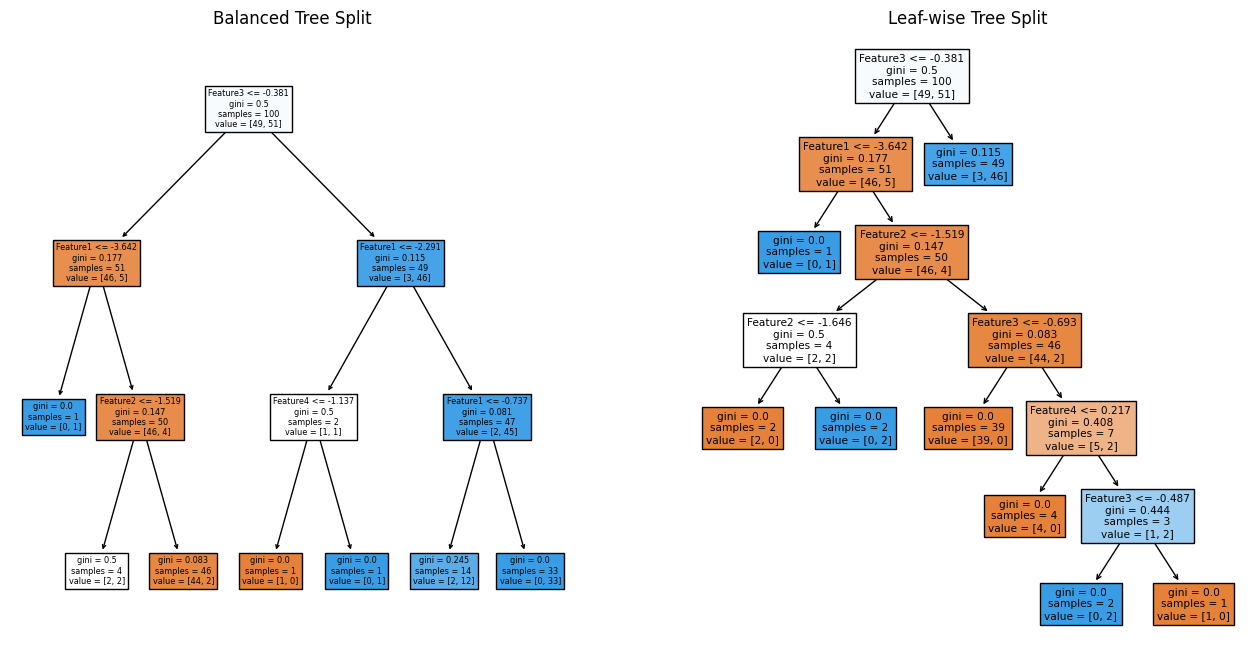

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree


# 데이터 생성
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0)

# 균형 트리 분할
balanced_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
balanced_tree.fit(X, y)

# 리프 중심 트리 분할
# scikit-learn의 DecisionTreeClassifier는 리프 중심 분할을 직접 지원하지 않지만, max_leaf_nodes를 사용하여 비슷하게 시뮬레이션할 수 있음
leaf_tree = DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)
leaf_tree.fit(X, y)

# 두 트리 시각화
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plot_tree(balanced_tree, filled=True, ax=ax[0], feature_names=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
ax[0].set_title('Balanced Tree Split')
plot_tree(leaf_tree, filled=True, ax=ax[1], feature_names=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
ax[1].set_title('Leaf-wise Tree Split')

plt.show()


In [ ]:
import lightgbm

print(lightgbm.__version__)

4.1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )
# n_estimators는 100 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=100, learning_rate=0.05, verbose=-1) # verbose=-1은 경고와 정보 메시지를 숨기는 설정

lgbm_wrapper.fit(X_train, y_train)
preds = lgbm_wrapper.predict(X_test)
accuracy = accuracy_score(y_test , preds)
print('예측 정확도:', accuracy)

예측 정확도: 0.956140350877193
